There are three useful ways to define distance.
1.  The line of sight comoving distance
\begin{equation}
    D_C = D_H \int_0^z \frac{dz'}{E(z')}.
\end{equation}
2.  The angular diameter distance is the ratio of an object's physical size to its angular size (in radians). For an object of size $\ell$ at redshift $z$ the angular size is $\theta = \ell/D_A$, where $\theta$ is a small angle (so $\sin\theta \approx \tan\theta \approx \theta$).
\begin{equation}
    D_A =
    \begin{cases}
    D_H \frac{1}{\sqrt{\Omega_k}(1+z)}\sinh(\sqrt{\Omega_k}D_C/D_H) & \Omega_k > 0, \\
    D_C\frac{1}{1 + z} & \Omega_k = 0, \\
    D_H \frac{1}{\sqrt{|\Omega_k|}(1+z)}\sin(\sqrt{|\Omega_k|}D_C/D_H) & \Omega_k < 0.
    \end{cases}
\end{equation}
3.  The luminosity distance $D_L$ is defined by the relationship between the observed photon energy flux $f$, integrated over all frequencies, and the intrinsic energy output from the source $L$ by
\begin{equation}
    f = \frac{L}{4\pi D_L^2}.
\end{equation}
It is related to the angular diameter distance by
\begin{equation}
    D_L = (1 + z)^2D_A.
\end{equation}

For the given case, $\Omega_m = 1$ and $\Omega_\Lambda = 0$. The relationship between the cosmological density parameters is given by
\begin{equation}
    \Omega_m + \Omega_\Lambda + \Omega_k = 1 \implies \Omega_k = 0.
\end{equation}
This corresponds to a flat, Euclidean universe. Then the angular diameter distance is given by
\begin{equation}
    D_A = \frac{D_C}{1 + z}.
\end{equation}
Noting that
\begin{equation}
    E(z) = \sqrt{\Omega_m(1 + z)^3 + \Omega_k(1 + z)^2 + \Omega_\Lambda} = (1 + z)^{3/2},
\end{equation}
the comoving distance $D_C$ is given by the integral
\begin{align}
    D_C
    &= D_H \int_0^z \frac{dz'}{E(z')} \\
    &= D_H \int_0^z \frac{dz'}{(1 + z')^{3/2}} \\
    &= D_H \left[-2(1 + z')^{-1/2}\right]_0^z \\
    &= 2D_H\left(1 - \frac{1}{\sqrt{1 + z}}\right).
\end{align}
Now, substitute the expression for $D_C$ back into the formula for $D_A$ to obtain the analytic expression for the angular diameter distance as a function of redshift for the Einstein-de-Sitter universe,
\begin{equation}
    D_A(z) = 2D_H\left(\frac{1}{1 + z} - \frac{1}{(1 + z)^{3/2}}\right).
\end{equation}
To find the redshift $z$ at which $D_A$ is maximum, we set the derivative of $D_A(z)$ with respect to $z$ to zero,
\begin{align}
    \frac{dD_A}{dz} = 2D_H\left(-\frac{1}{(1 + z)^2} + \frac{3}{2(1 + z)^{5/2}} \right) = 0.
\end{align}
Solving for $z$ yields $z = 5/4 = 1.25$. This shows that the angular diameter distance has a turning point at $z = 1.25$. A simple check of the second derivative confirms this is a maximum.

Dimensionless Distances for Cosmological Models
Model (Ωm, ΩΛ)       | z=1.0  DA/DH | z=1.0  DL/DH | z=1.25 DA/DH | z=1.25 DL/DH | z=2.0  DA/DH | z=2.0  DL/DH | z=4.0  DA/DH | z=4.0  DL/DH
--------------------------------------------------------------------------------------------------------------------------------------------
(1.0, 0.0)           | 0.2929       | 1.1716       | 0.2963       | 1.5000       | 0.2818       | 2.5359       | 0.2211       | 5.5279      
(0.04, 0.0)          | 0.3701       | 1.4804       | 0.3945       | 1.9971       | 0.4317       | 3.8853       | 0.4508       | 11.2692     
(0.27, 0.73)         | 0.3928       | 1.5713       | 0.4102       | 2.0767       | 0.4141       | 3.7267       | 0.3461       | 8.6524      


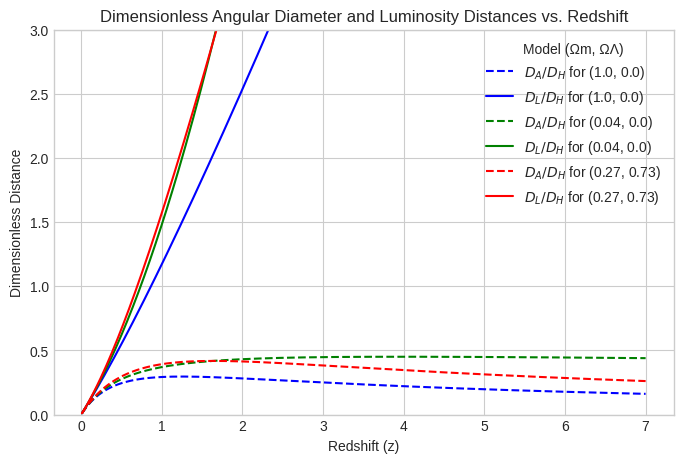

In [11]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def comoving_distance_dimless(z_target, Omega_m, Omega_Lambda):
    '''
    Calculates the dimensionless comoving distance, DC/DH.
    '''
    Omega_k = 1.0 - Omega_m - Omega_Lambda

    def integrand(z):
        E_z = np.sqrt(Omega_m * (1 + z)**3 + Omega_k * (1 + z)**2 + Omega_Lambda)
        return 1 / E_z

    integral, _ = quad(integrand, 0, z_target)
    return integral

def angular_diameter_distance_dimless(z, Omega_m, Omega_Lambda):
    '''
    Calculates the dimensionless angular diameter distance, DA/DH.
    '''
    Omega_k = 1.0 - Omega_m - Omega_Lambda
    Dc_div_DH = comoving_distance_dimless(z, Omega_m, Omega_Lambda)

    if np.isclose(Omega_k, 0):
        # Flat universe (Omega_k = 0)
        Da_div_DH = Dc_div_DH / (1 + z)
    elif Omega_k > 0:
        # Open universe (Omega_k > 0)
        factor = 1 / ((1 + z) * np.sqrt(Omega_k))
        Da_div_DH = factor * np.sinh(np.sqrt(Omega_k) * Dc_div_DH)
    else:
        # Closed universe (Omega_k < 0)
        factor = 1 / ((1 + z) * np.sqrt(np.abs(Omega_k)))
        Da_div_DH = factor * np.sin(np.sqrt(np.abs(Omega_k)) * Dc_div_DH)

    return Da_div_DH

def luminosity_distance_dimless(Da_div_DH, z):
    '''
    Calculates the dimensionless luminosity distance, DL/DH, from DA/DH.
    '''
    return Da_div_DH * (1 + z)**2

models = {
    "(1.0, 0.0)": {"Omega_m": 1.0, "Omega_Lambda": 0.0},
    "(0.04, 0.0)": {"Omega_m": 0.04, "Omega_Lambda": 0.0},
    "(0.27, 0.73)": {"Omega_m": 0.27, "Omega_Lambda": 0.73},
}

z_table = [1.0, 1.25, 2.0, 4.0]
z_plot = np.linspace(0.01, 7, 300)


print("Dimensionless Distances for Cosmological Models")
header = f"{'Model (Ωm, ΩΛ)':<20}"
for z in z_table:
    header += f" | z={z:<4} DA/DH"
    header += f" | z={z:<4} DL/DH"
print(header)
print("-" * len(header))

for model_name, params in models.items():
    row_str = f"{model_name:<20}"
    for z in z_table:
        da_val = angular_diameter_distance_dimless(z, params["Omega_m"], params["Omega_Lambda"])
        dl_val = luminosity_distance_dimless(da_val, z)
        row_str += f" | {da_val:<12.4f}"
        row_str += f" | {dl_val:<12.4f}"
    print(row_str)

fig, ax = plt.subplots(figsize=(8, 5))
colors = ['blue', 'green', 'red']
color_idx = 0

for model_name, params in models.items():
    color = colors[color_idx]
    DA_values = [angular_diameter_distance_dimless(z, params["Omega_m"], params["Omega_Lambda"]) for z in z_plot]
    DL_values = [luminosity_distance_dimless(da, z) for da, z in zip(DA_values, z_plot)]
    ax.plot(z_plot, DA_values, linestyle='--', color=color, label=f'$D_A/D_H$ for {model_name}')
    ax.plot(z_plot, DL_values, linestyle='-', color=color, label=f'$D_L/D_H$ for {model_name}')
    color_idx += 1

ax.set_xlabel("Redshift (z)")
ax.set_ylabel("Dimensionless Distance")
ax.set_title("Dimensionless Angular Diameter and Luminosity Distances vs. Redshift")
ax.legend(title="Model (Ωm, ΩΛ)")
ax.set_ylim(0, 3)
ax.grid(True)
plt.show()

For all models, the luminosity distance $D_L$ increases monotonically with redshift. A higher redshift object is always fainter. The angular diameter distance behaves differently. It initially increases with redshift but then reaches a maximum and begins to decrease. This effect means that objects at very high redshifts can appear larger in angular size than identical objects at an intermediate redshift.